In this dataset, we have the TOP 250 transfers by seasons from 2000-2001 to 2018-2019.
Let's see what we can do ! 

I've been learning python for few month, any advice is welcome !
Feel free to contact me if you see any mystake or I you know how to improve my code :)

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [111]:
df = pd.read_csv("top250.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4700 non-null   object 
 1   Position      4700 non-null   object 
 2   Age           4700 non-null   int64  
 3   Team_from     4700 non-null   object 
 4   League_from   4700 non-null   object 
 5   Team_to       4700 non-null   object 
 6   League_to     4700 non-null   object 
 7   Season        4700 non-null   object 
 8   Market_value  3440 non-null   float64
 9   Transfer_fee  4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


In [5]:
df.describe()

,Age,Market_value,Transfer_fee
count,4700.000000,3.440000e+03,4.700000e+03
mean,24.338723,8.622469e+06,9.447586e+06
std,3.230809,8.795181e+06,1.043772e+07
min,0.000000,5.000000e+04,8.250000e+05
25%,22.000000,3.500000e+06,4.000000e+06
50%,24.000000,6.000000e+06,6.500000e+06
75%,27.000000,1.000000e+07,1.082000e+07
max,35.000000,1.200000e+08,2.220000e+08


In [6]:
df[df["Age"] == 0]

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
236,Marzouq Al-Otaibi,Centre-Forward,0,Shabab,Saudi Arabia,Ittihad,Saudi Arabia,2000-2001,NaN,2000000


In [7]:
df.drop(236, inplace=True)

In [8]:
df.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


In [4]:
# FEATURE ENGINEERING
# AGE classe -> -22 ; 23-26, 27-30, 30+
# Position classe -> gk, defender, midfielder, attacking
# top 5 league



# Joueurs + argent cumulé
# Club qui vendent le plus ( count - sum )
# Club qui achetent le plus ( count - sum )
# league qui achetent / vendent le plus
# Position price comparison 
# Age is important ? Scatterplot
# Evolution of price by season
# Difference entre market value and transfer fee
# transfert d'une league à l'autre
# par saison

# Feature Engineering

In [135]:
df.value_counts("Position")

Position
Centre-Forward        1221
Centre-Back            716
Central Midfield       488
Attacking Midfield     426
Defensive Midfield     411
Right Winger           305
Left Winger            267
Left-Back              225
Right-Back             181
Goalkeeper             180
Second Striker         130
Left Midfield           87
Right Midfield          63
dtype: int64

In [133]:
position_dict = {"Forward" : "Centre-Forward", 
                 "Midfielder" : "Central Midfield",
                 "Defender" : "Centre-Back",
                 "Sweeper" : "Centre-Back"}

def reduce_position(x):
    for i,j in position_dict.items():
        if i == x:
            return position_dict[i]
    return x

In [134]:
df["Position"] = df["Position"].apply(reduce_position)

In [49]:
df.value_counts("Age")

Age
24    536
25    524
23    519
26    481
22    461
27    404
21    371
28    327
20    302
29    223
19    165
30    157
18     82
31     59
32     30
17     23
33     15
16     10
34      5
35      4
15      1
0       1
dtype: int64

In [10]:
# We create categories of age

age_dict = {"-22" : [15,16,17,18,19,20,21,22], "23-26" : [23,24,25,26], "27-30" : [27, 28, 29, 30], "33+" : [31,32,33,34,35]}

def age(x):
    for i,j in age_dict.items():
        if x in j:
            return i

In [11]:
# It will be used to know if teams from the big 5 are really different from other leagues
big5_list = ["Premier League", "Serie A", "Ligue 1", "LaLiga", "1.Bundesliga"]

In [12]:
df["Position"] = df["Position"].apply(reduce_position)
df["Age_class"] = df["Age"].apply(age)
df["Big5_from"] = df["League_from"].apply(lambda x: "y" if x in big5_list else "n")
df["Big5_to"] = df["League_to"].apply(lambda x: "y" if x in big5_list else "n")
# divide the price by 1 million
df["Transfer_fee"] = df["Transfer_fee"].apply(lambda x: x/1000000)
df["Market_value"] = df["Market_value"].apply(lambda x: x/1000000)

In [13]:
df["Market_value"] = df["Market_value"].apply(lambda x: x/1000000)

In [71]:
df.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee,Position_2,Age_class,Big5_from,Big5_to
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60.00,Attack,27-30,1,1
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56.81,Attack,23-26,1,1
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40.00,Attack,27-30,1,1
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36.15,Attack,33+,1,1
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34.50,Attack,-22,1,1


# EDA

## Function

Some functions we'll use, might have some more that are hidden somewhere in the notebook :)

In [14]:
# function to get a df with number of movement, mean transfer fee and sum of transfer fee for any variable
def cms(df, variable, number_result):
    # numbe result = number of rows
    df_count = df.groupby(variable).count().sort_values("Name",ascending=False).head(number_result)
    df_mean = df.groupby(variable).mean().sort_values("Transfer_fee",ascending=False).head(number_result)
    df_sum = df.groupby(variable).sum().sort_values("Transfer_fee",ascending=False).head(number_result)
    return df_count, df_mean, df_sum

In [15]:
# function to create a barchart with plotly express
def barchart(df, variable):
    fig = px.bar(df, y=variable, template="plotly_dark",
                 color_discrete_sequence=["#E1AFFD"], text_auto=True)
    return fig.show()

In [16]:
# Function to create a barchat with a dropdown menu
# variable1 is used in the cms function to do a groupby and get count, mean, sum
# number_result = number of rows
# x axis = variable1
# y axis = variable2
def barchart_cms(df, variable1, number_result, variable2):
    # use cms function
    df_count, df_mean, df_sum = cms(df, variable1, number_result)
    df_list = [df_count, df_mean, df_sum]
    
    # labels for the menu's buttons
    label_list = ["Count", "Mean", "Sum"]
    label_df = list(zip(df_list, label_list))
    # item_list will contain the charts to be displayed for each label
    item_list = []
    
    # creation of each chart to be displayed
    for i, j in label_df :
        # i = df_count, df_mean, df_sum
        # j = label_list
        item = dict(args=[{"x" : [i.index], "y" : [i[variable2]] }, # set x and y axis
                         {"title" : f"{variable1}, {variable2}, " + j} # set title
                         ],
                         label=j, method="update") #label = name of button, 
                                        #method="update", modify data and layout
                                        #method="restyle", modify data
                                        #method="relayout", modify layout
        item_list.append(item)
                
    # creation of the first chart            
    fig = px.bar(df_count, y=variable2, template="plotly_dark",
                 color_discrete_sequence=["#E1AFFD"], text_auto=True)
    fig.update_layout(title_x=0.5) # title at the center of the chart
    
    # creation ot the dropdown menu
    fig.update_layout(
        updatemenus=[
            # item_list = list of our charts !
            dict(buttons=list(item_list),  
                   
             # place of the dropdown menu
            direction="down",showactive=True,x=0.01,
            xanchor="left",y=1.2,yanchor="top")])
    return fig.show()

## Players

In [86]:
# most expensive movement
df.sort_values("Transfer_fee", ascending=False).head(10)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee,Position_2,Age_class,Big5_from,Big5_to
4211,Neymar,Left Winger,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017-2018,100.0,222.0,Attack,23-26,y,y
4455,Kylian Mbappé,Right Winger,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018-2019,120.0,135.0,Attack,-22,y,y
4212,Philippe Coutinho,Attacking Midfield,25,Liverpool,Premier League,FC Barcelona,LaLiga,2017-2018,90.0,125.0,Midfield,23-26,y,y
4456,Cristiano Ronaldo,Centre-Forward,33,Real Madrid,LaLiga,Juventus,Serie A,2018-2019,100.0,117.0,Attack,33+,y,y
4213,Ousmane Dembélé,Right Winger,20,Bor. Dortmund,1.Bundesliga,FC Barcelona,LaLiga,2017-2018,33.0,115.0,Attack,-22,y,y
3961,Paul Pogba,Central Midfield,23,Juventus,Serie A,Man Utd,Premier League,2016-2017,70.0,105.0,Midfield,23-26,y,y
3217,Gareth Bale,Right Winger,24,Spurs,Premier League,Real Madrid,LaLiga,2013-2014,65.0,101.0,Attack,23-26,y,y
2226,Cristiano Ronaldo,Centre-Forward,24,Man Utd,Premier League,Real Madrid,LaLiga,2009-2010,60.0,94.0,Attack,23-26,y,y
3962,Gonzalo Higuaín,Centre-Forward,28,SSC Napoli,Serie A,Juventus,Serie A,2016-2017,65.0,90.0,Attack,27-30,y,y
3218,Neymar,Left Winger,21,Santos FC,Série A,FC Barcelona,LaLiga,2013-2014,50.0,88.2,Attack,-22,n,y


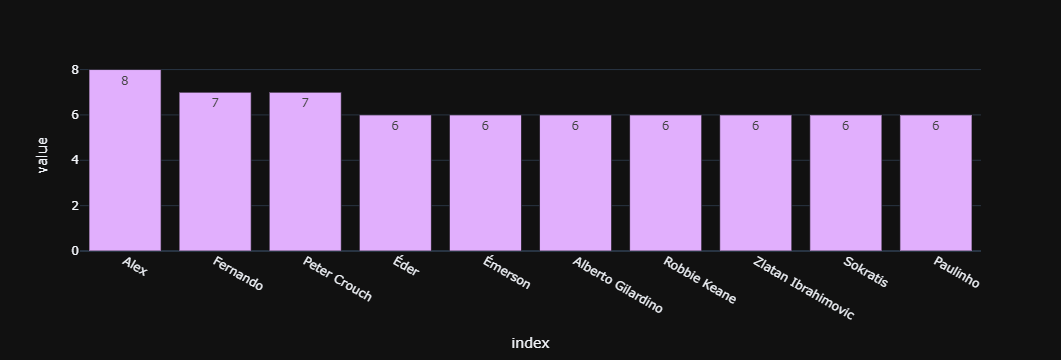

In [137]:
# Players with the most movement
df_player_count = df.Name.value_counts().head(10)
fig = px.bar(df_player_count, template="plotly_dark",
            color_discrete_sequence= ["#E1AFFD"], text_auto=True)
fig.update_layout(showlegend=False)
fig.show()

We can see that Alex is the player with the most movement. Football fans will remember that there is 2 Alex that were famous. One who played for Chelsea and PSG and one magician who played in Turkey. Let's check it !

In [19]:
df[df["Name"] == "Alex"]
# There is 2 Alex. The highest transfer fee for them is 11.5M, it won't have a huge impact if we get rid of them !

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee,Position_2,Age_class,Big5_from,Big5_to
321,Alex,Attacking Midfield,23,Cruzeiro,Brazil,Parma,Serie A,2001-2002,NaN,8.0,Midfield,23-26,n,y
357,Alex,Attacking Midfield,24,Parma,Serie A,Cruzeiro,Brazil,2001-2002,NaN,6.0,Midfield,23-26,y,n
1007,Alex,Centre-Back,22,Santos FC,Brazil,Chelsea,Premier League,2004-2005,NaN,11.5,Defense,-22,n,y
1092,Alex,Attacking Midfield,26,Cruzeiro,Brazil,Fenerbahce,Süper Lig,2004-2005,NaN,4.0,Midfield,23-26,n,n
2139,Alex,Attacking Midfield,26,Internacional,Série A,Spartak Moscow,Premier Liga,2008-2009,7.5,5.0,Midfield,23-26,n,n
2584,Alex,Attacking Midfield,29,Spartak Moscow,Premier Liga,Corinthians,Série A,2010-2011,8.0,6.0,Midfield,27-30,n,n
2880,Alex,Centre-Back,29,Chelsea,Premier League,Paris SG,Ligue 1,2011-2012,13.0,5.0,Defense,27-30,y,y
3099,Alex,Attacking Midfield,30,Corinthians,Série A,Al Gharafa,Stars League,2012-2013,3.5,6.0,Midfield,27-30,n,n


In [20]:
# Drop players named Alex
df = df[df.Name != "Alex"]

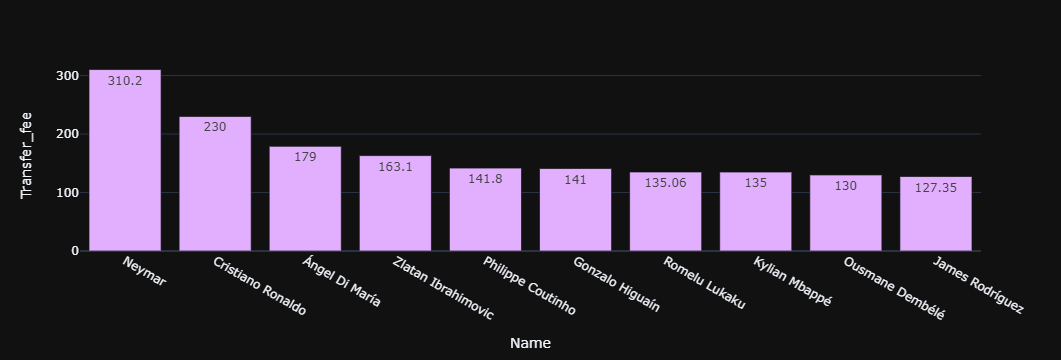

In [21]:
# Cumulative transfer fees, most expensive players

df_player_sum = df.groupby("Name").sum().sort_values("Transfer_fee", ascending=False).head(10)

barchart(df_player_sum, "Transfer_fee")

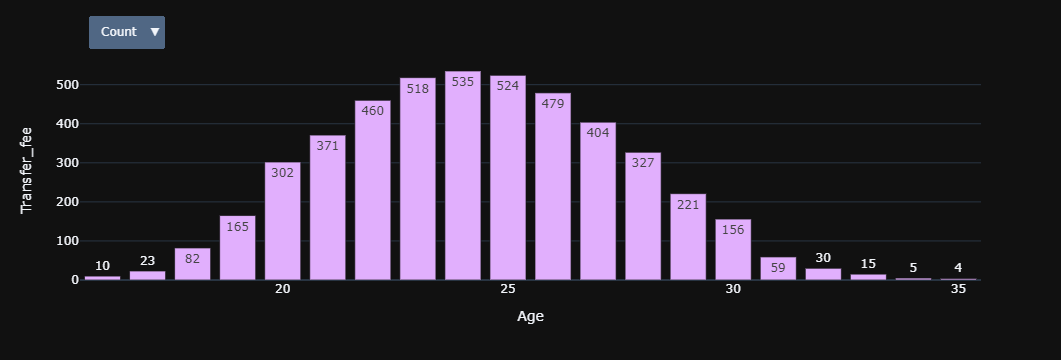

In [23]:
# Number of transfer by Age 
# Mean transfer fee by Age
# Sum of transfer fees by Age

# 33 yo players mean transfer fee is so high because of CR7 ! 
# no real surprise here :)
barchart_cms(df, "Age", 20, "Transfer_fee")

## Position

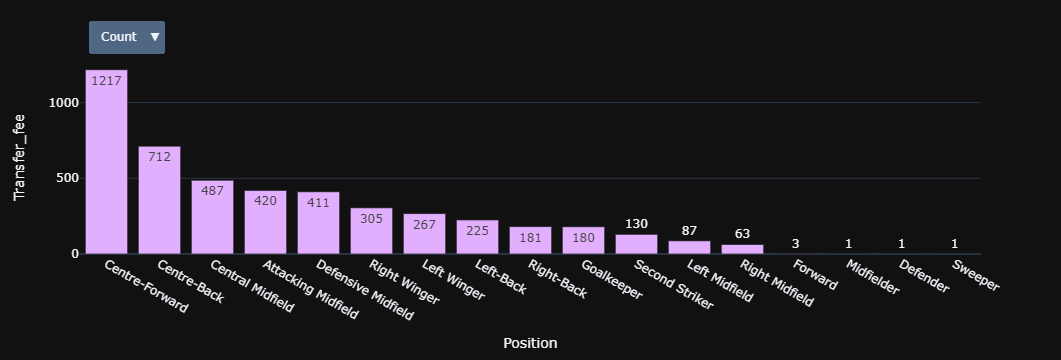

In [24]:
# Number of transfer by postion
# Mean and sum of transfer fees 

# Centre Forward are the most traded players ! 
# Left and Right winger are more expenseive :)
barchart_cms(df, "Position", 17, "Transfer_fee")

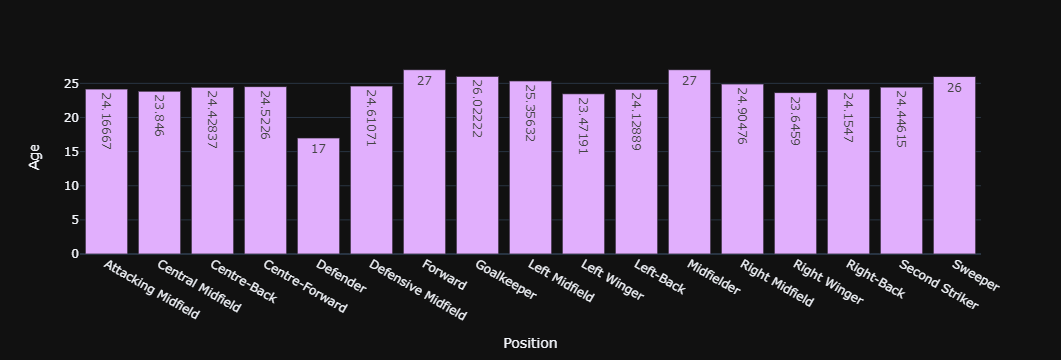

In [26]:
# Average Age by position
df_position_age = df.groupby("Position").mean()
barchart(df_position_age, "Age")

# Left and Right winger seems to be traded at a younger age than other position
# could be why there are more expensive

In [96]:
def bar_polar_position(df, variable):
    # groupby by position then by variable
    df_position_count = df.groupby(["Position", variable]).count()
    df_position_count.reset_index(inplace=True)
    # sort by count with "Name" or any other column except market_value
    df_position_count.sort_values(["Position", "Name"], ascending=[True, False], inplace=True)
    
    # get a list of position
    position_list = set(df_position_count.Position.tolist())
    
    # item_list will contain the charts to be displayed
    item_list = []
    # for each position
    for i in position_list :
            df_int = df_position_count[df_position_count["Position"] == i]
            
            # create chart
            # theta = top 10 leagues
            # r = number of transfers
            # we've already seen the rest :)
            item = dict(args=[{"theta" : [df_int[variable].head(10)], 
                               "r" : [df_int["Name"].head(10)]},
                             {"title" : i }], 
                         label=i, method="update") 
            item_list.append(item)

    # first chart to be displayed by the drop down menu
    first_pos = item_list[0]['args'][1]["title"]
    # "title" give us the Position's name
    # create a df for the first chart to display so it matches the  menu
    df_firstviz = df_position_count[df_position_count["Position"] == first_pos]

    # bar polar creation
    fig = px.bar_polar(df_firstviz.head(10), 
                       r="Name", theta=variable,
                       template="plotly_dark",color_discrete_sequence= ["#E1AFFD"],
                       width=650, height=600)
    fig.update_layout(title_x=0.5)

    # dropdown menu creation
    fig.update_layout(
        updatemenus=[
            # item list = list of the charts !
            dict(buttons=list(item_list),  

             # place of the dropdown menu
            direction="down",showactive=True,x=0.005,
            xanchor="left",y=1.2,yanchor="top") ] )
    return fig.show()

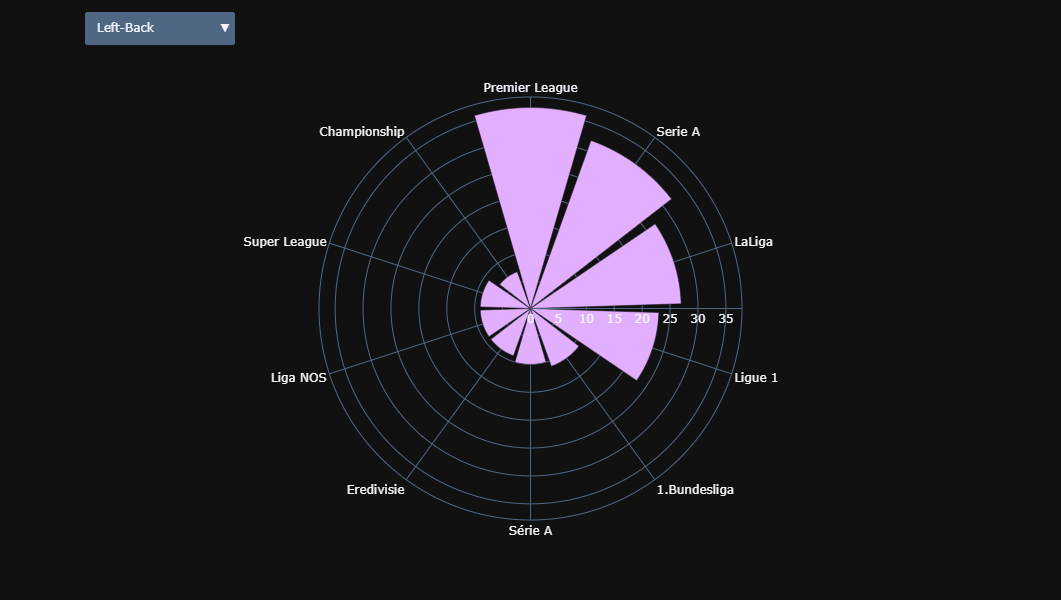

In [97]:
# For each position we have the league with the most sells
bar_polar_position(df, "League_from")

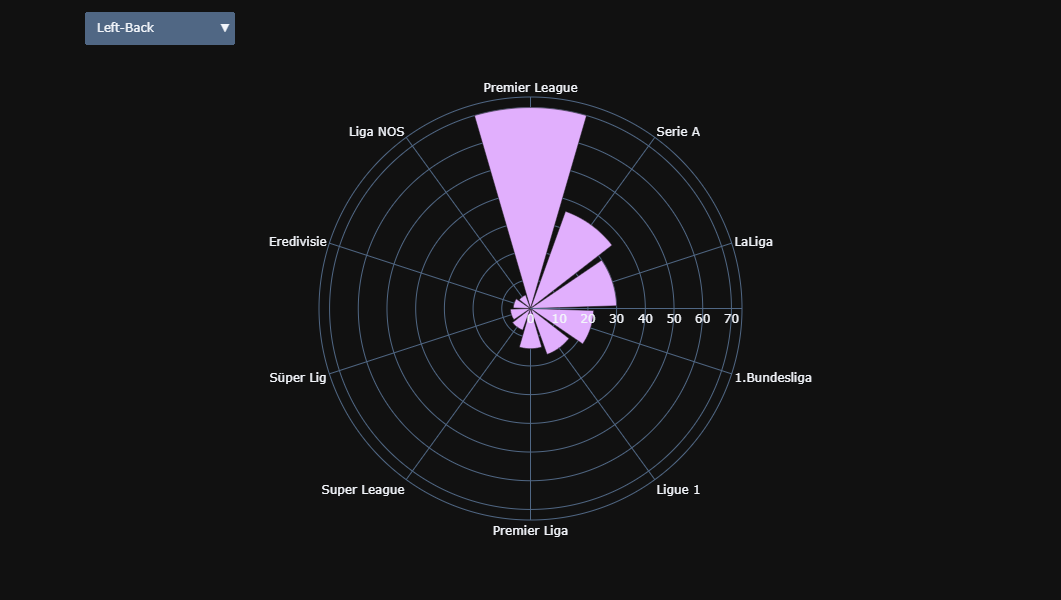

In [98]:
# For each position we have the league with the most buys ! 
bar_polar_position(df, "League_to")

## Teams

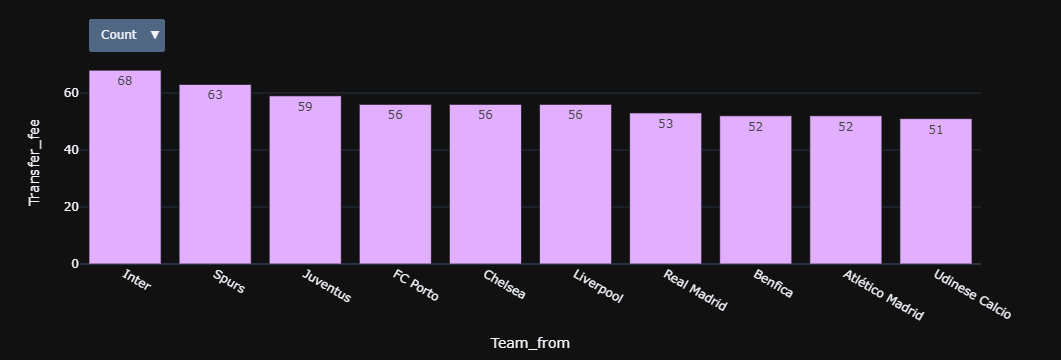

In [34]:
# Here we have the best sellers !
# By number of transfers, mean and sum of transfer_fee
barchart_cms(df, "Team_from", 10, "Transfer_fee")

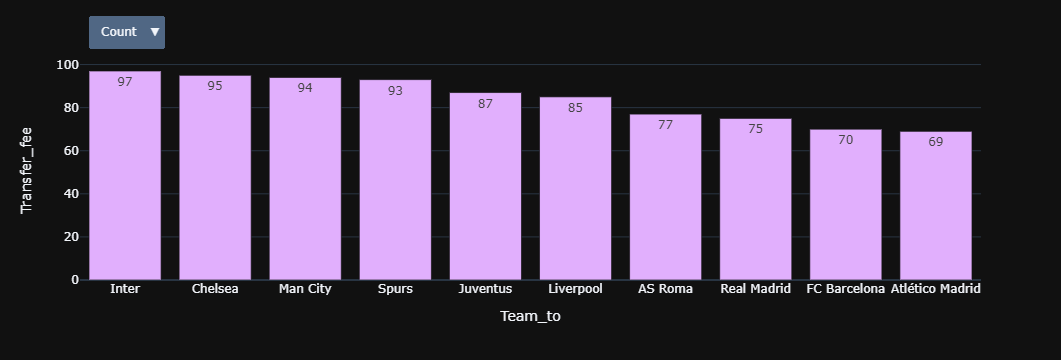

In [35]:
# Teams who spend the most !
barchart_cms(df, "Team_to", 10, "Transfer_fee")

In [36]:
# teams with best margins between buys and sells
# sum of transfer fee spent or received by teams
df_sum_from = df.groupby("Team_from").sum()
df_sum_to = df.groupby("Team_to").sum()

# merge both df
df_margin = pd.merge(df_sum_from, df_sum_to, how="left", left_on=df_sum_from.index, right_on=df_sum_to.index, suffixes=["_from", "_to"])
# rename key_0 column
df_margin.rename(columns={"key_0" : "Team"}, inplace=True)

# replace NaN by 0
df_margin = df_margin.replace({np.NaN : 0})
# create a column with the difference between fee received and money spent ! 
df_margin["transfer_delta"] = df_margin["Transfer_fee_from"] - df_margin["Transfer_fee_to"]
df_margin.sort_values("transfer_delta", ascending=False, inplace=True)
df_margin.set_index("Team", inplace=True)

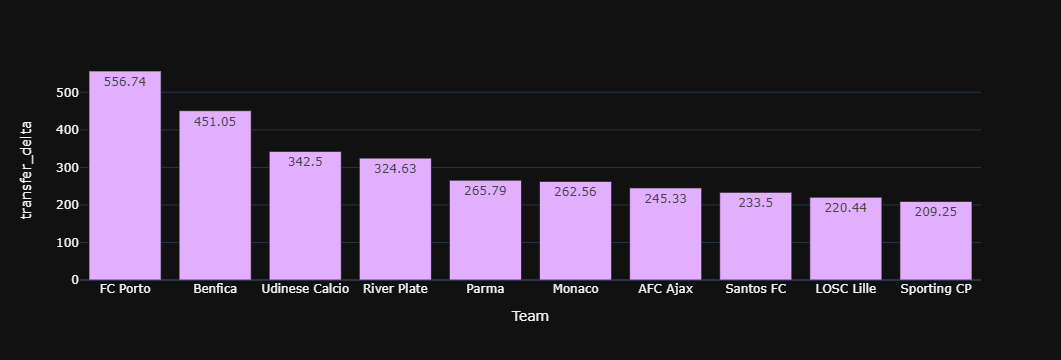

In [40]:
# Top 10 with biggest margin between sells and buys
barchart(df_margin.head(10), "transfer_delta")

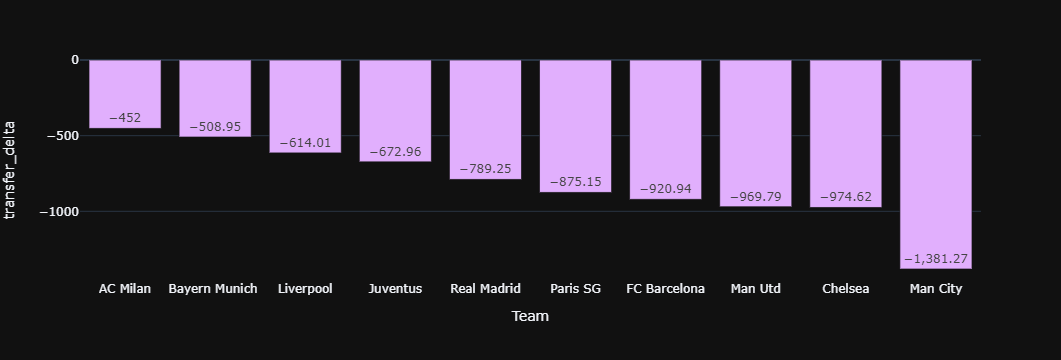

In [41]:
# those who lost money :)
barchart(df_margin.tail(10), "transfer_delta")

In [99]:
# teams with best margins between market value and sells
# not all seasons have market_value
df_margins_market = df[df["Market_value"].notna()]
df_market = df_margins_market.groupby("Team_from").sum()

df_market["transfer_delta"] = df_market["Transfer_fee"] - df_market["Market_value"]
df_market.sort_values("transfer_delta", ascending=False, inplace=True)


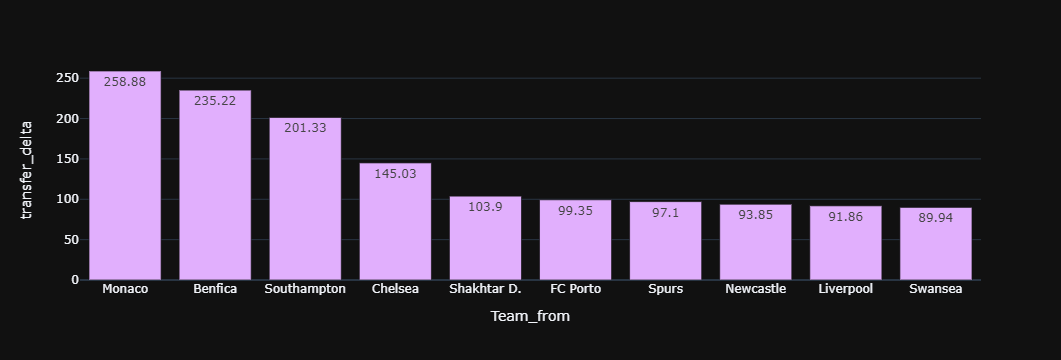

In [100]:
# Top 10 with biggest margin between the transfer fee received and the market value of the players
# they know how to sell right ?
barchart(df_market.head(10), "transfer_delta")

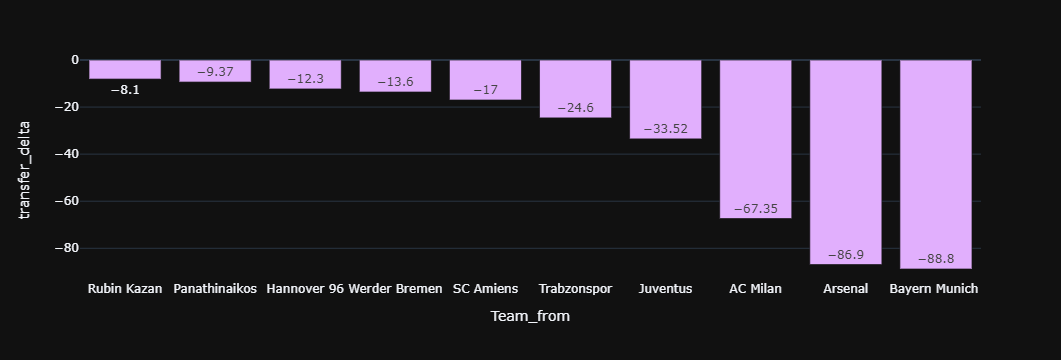

In [43]:
# those who might need lesson in negociation
barchart(df_market.tail(10), "transfer_delta")

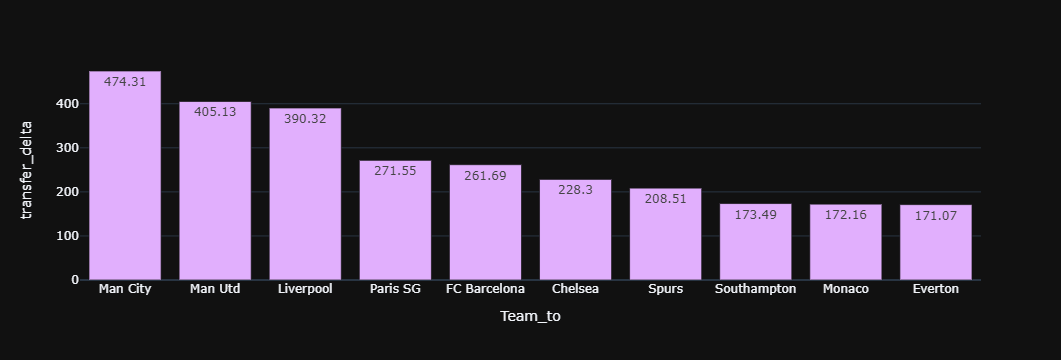

In [102]:
df_market_sell = df_margins_market.groupby("Team_to").sum()

df_market_sell["transfer_delta"] = df_market_sell["Transfer_fee"] - df_market_sell["Market_value"]
df_market_sell.sort_values("transfer_delta", ascending=False, inplace=True)

# difference betwen transfer fee paid and player's market value
# those who just splash the cash 
barchart(df_market_sell.head(10), "transfer_delta")

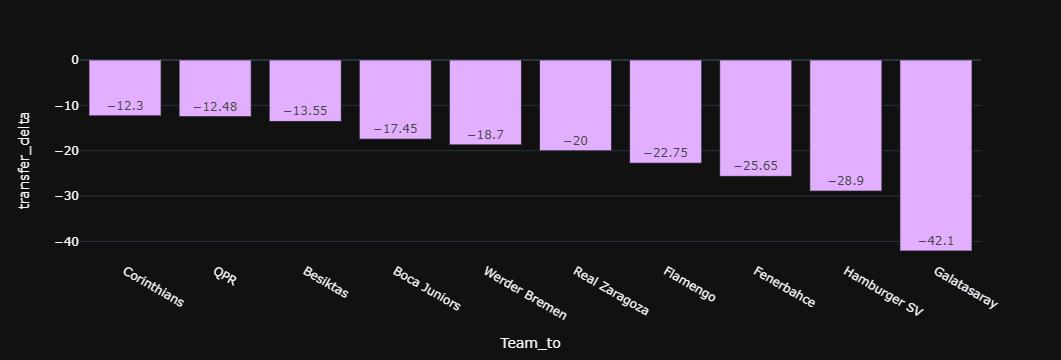

In [103]:
# Lesson n°1 kids, only buy when it's sales season
barchart(df_market_sell.tail(10), "transfer_delta")

## Leagues

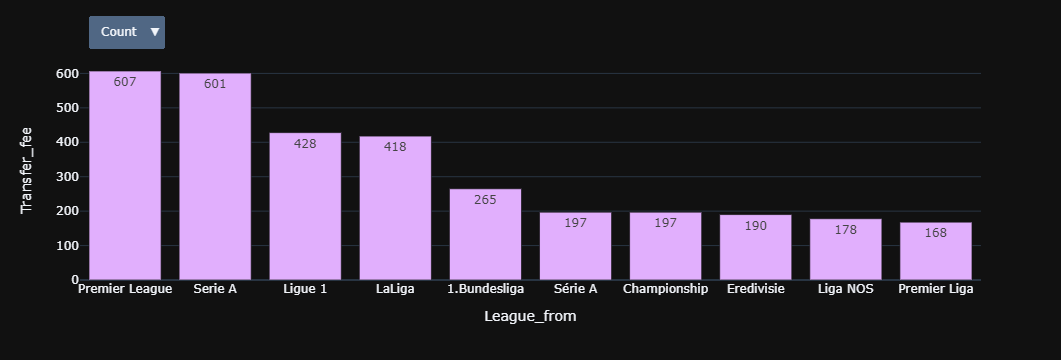

In [44]:
# not much about leagues here, we'll see that in part 2 ! 

# best sellings leagues ! 
barchart_cms(df, "League_from", 10, "Transfer_fee")

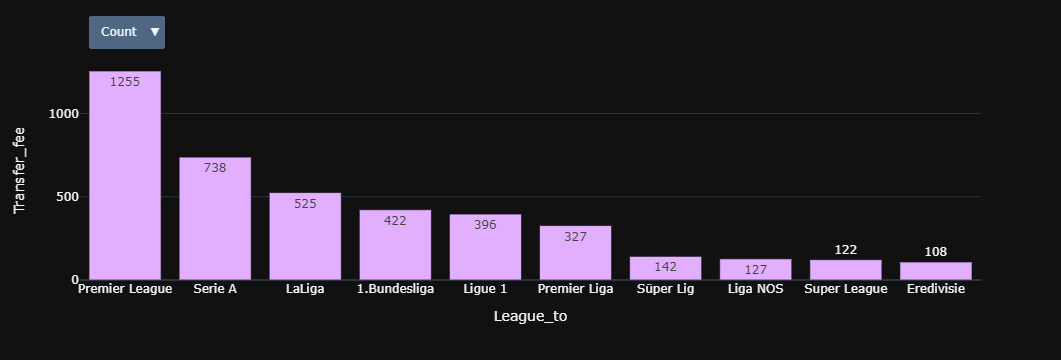

In [45]:
# $$$
barchart_cms(df, "League_to", 10, "Transfer_fee")

## Season

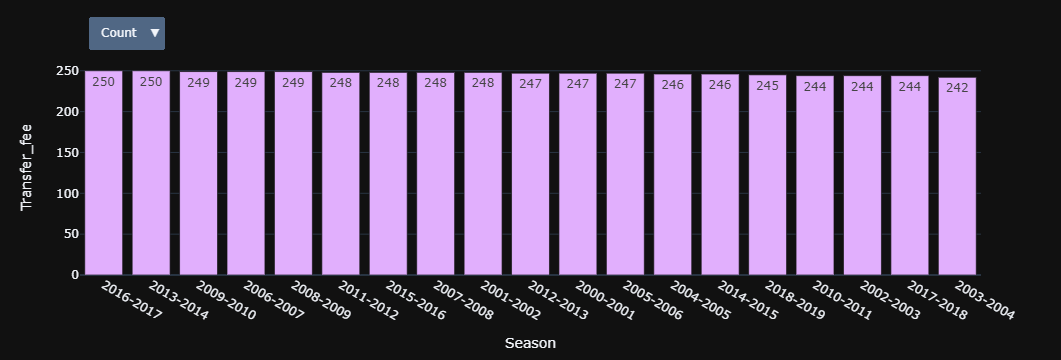

In [46]:
# Number of movements by season
# Average transfer fee
# cumulative transfer fee

barchart_cms(df, "Season", 20, "Transfer_fee")

In [72]:
def animated_season(df, variable, agg):
    if agg == "count":
        return "Only works for 'mean' and 'sum' "
    elif agg == "mean":
        df_animated_season = df.groupby(["Season", variable]).mean().reset_index()
    elif agg == "sum":
        df_animated_season = df.groupby(["Season", variable]).sum().reset_index()
    else :
        return "Only valid values for agg are : 'count', 'mean', 'sum' !"
    
    season_list = df_animated_season.Season.tolist()
    season_set = set(season_list)
    
    # we take the top 10 by season for the variable we choose
    df_list = []
    for item in season_set:
        df_int = df_animated_season[df_animated_season["Season"] == item].sort_values("Transfer_fee", ascending=False).head(10)
        df_list.append(df_int)

    # concat all the df
    # we'll use this one for the viz
    df_top_10 = pd.concat(df_list)    
    df_top_10.sort_values(["Season", "Transfer_fee"], ascending=[True,False], inplace=True)
    # liste de df par saison top 10
    # concat tout en 1 df

    # get the max value per season and add it to a new column
    # used for y axis range 
    list1 = df_top_10.groupby("Season").max().index.tolist()
    list2 = df_top_10.groupby("Season").max().Transfer_fee.tolist()
    list3 = list(zip(list1, list2))

    def max_fee_season(x):
        for i, j in list3:
            if x == i :
                return j
    df_top_10["max_fee"] = df_top_10["Season"].apply(max_fee_season)
    
    
    fig = px.bar(df_top_10,
             x=variable, y="Transfer_fee", template="plotly_dark", animation_frame="Season",
             color_discrete_sequence=["#E1AFFD"], text_auto=True, height=500)

    # for each frame of our animated graph, we update the y axis range, so it matches
    # the max value, make it more readable
    for f in fig.frames:
        f.layout.update(yaxis_range = [0, df_top_10["max_fee"].unique()[fig.frames.index(f)]])
    
    # set the duration time for each frame
    fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
    return fig.show()

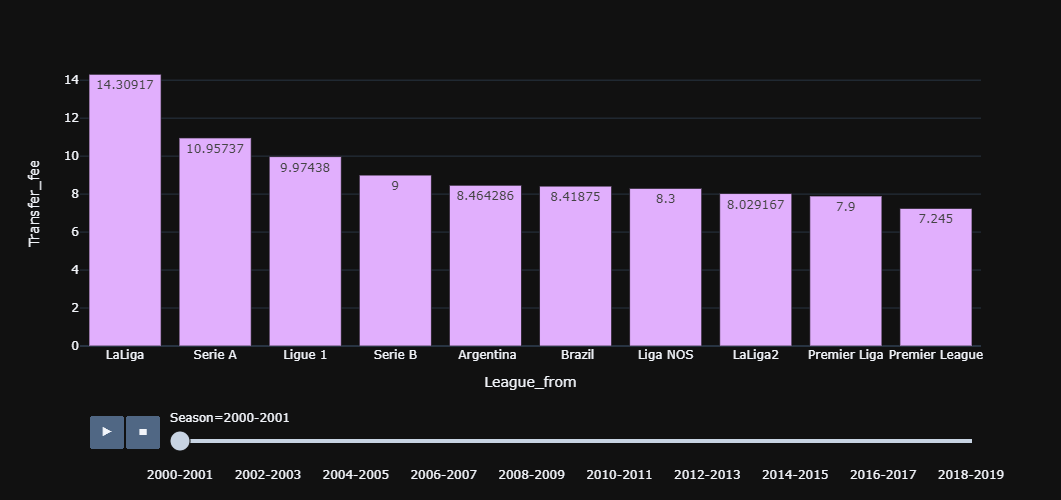

In [73]:
# Leagues with the highest average sell price by season
animated_season(df, "League_from", "mean")

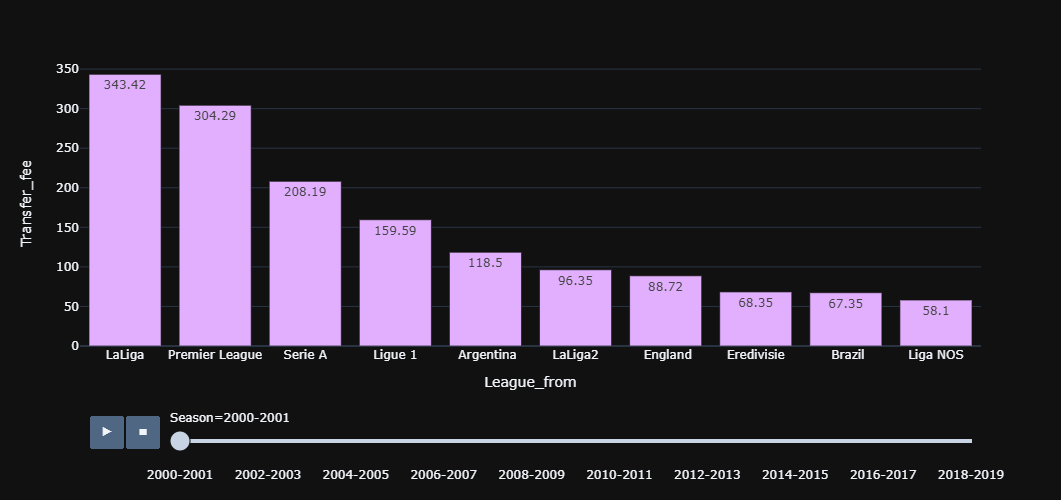

In [74]:
# leagues with the most cumulative transfer fee by season
animated_season(df, "League_from", "sum")

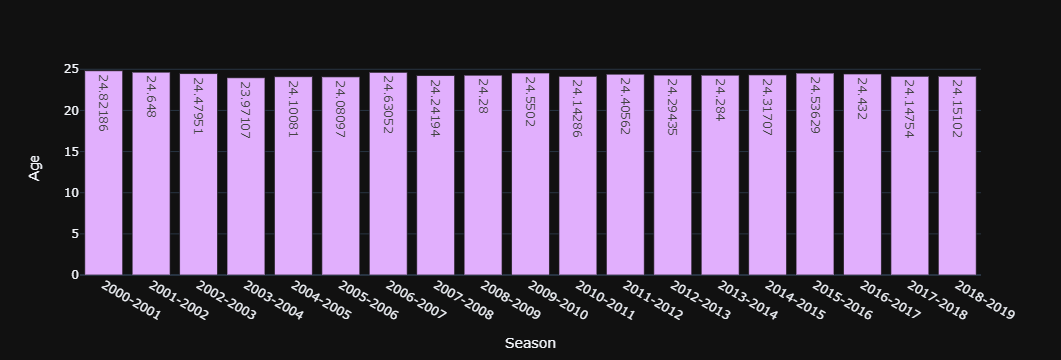

In [370]:
# Average Age by season


df_season_age = df.groupby("Season").mean()
barchart(df_season_age, "Age")

In [55]:
def bar_polar_position_season(df, agg):
    if agg == "count":
        df_position_season = df.groupby(["Season", "Position"]).count()
    elif agg == "mean":
        df_position_season = df.groupby(["Season", "Position"]).mean()
    elif agg == "sum":
        df_position_season = df.groupby(["Season", "Position"]).sum()
    else :
        return "Only valid values for agg are : 'count', 'mean', 'sum' !"
    
    # reset index, then sort values by positions and transfer fee
    df_position_season.reset_index(inplace=True)
    df_position_season.sort_values(["Position", "Transfer_fee"], ascending=[True, False], inplace=True)
    
    # get list of position
    position_list = set(df_position_season.Season.tolist())
    
    # item list will contains the charts to be displayed
    item_list = []
    
    # creation of the charts to display, we've already seen that
    for i in position_list :
            df_int = df_position_season[df_position_season["Season"] == i]
            item = dict(args=[{"theta" : [df_int["Position"].head(20)], 
                               "r" : [df_int["Transfer_fee"].head(20)]},
                             {"title" : i }], 
                         label=i, method="update") 
            item_list.append(item)

    # first chart to be displayed by the drop down menu
    first_season = item_list[0]['args'][1]["title"]       
    # let's create the first chart so it matches the menu
    df_firstviz = df_position_season[df_position_season["Season"] == first_season]

    fig = px.bar_polar(df_firstviz, 
                       r="Transfer_fee", theta="Position",
                       template="plotly_dark",color_discrete_sequence= ["#E1AFFD"],
                       width=600, height=600)
    fig.update_layout(title_x=0.5)

    fig.update_layout(
        updatemenus=[
            # all our charts !
            dict(buttons=list(item_list),  

             # place of the dropdown menu
            direction="down",showactive=True,x=0.01,
            xanchor="left",y=1.2,yanchor="top")])
    return fig.show()

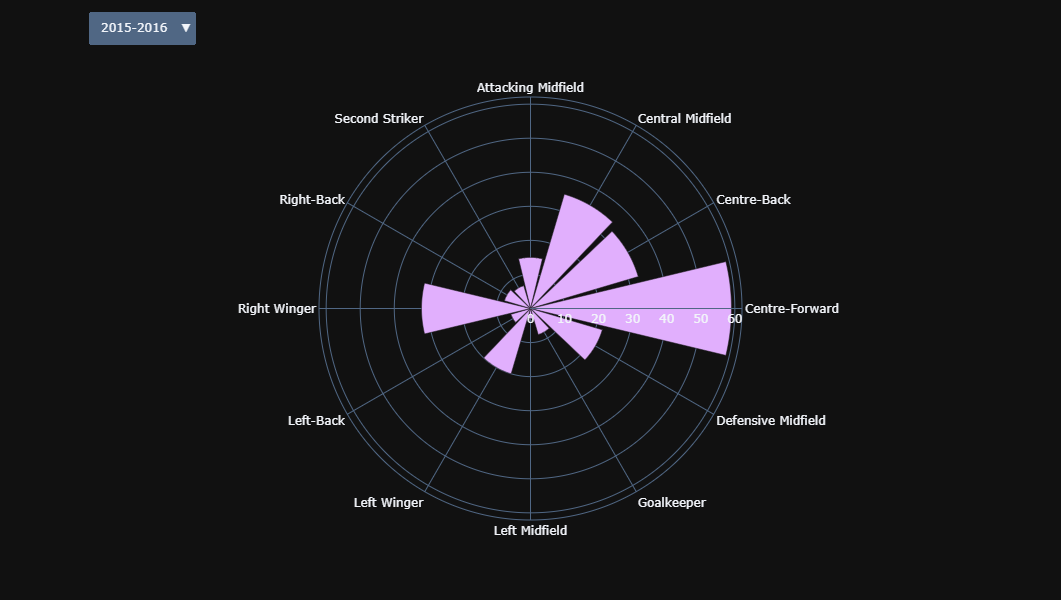

In [56]:
# For each season, we have the number of movement by position

bar_polar_position_season(df, "count")

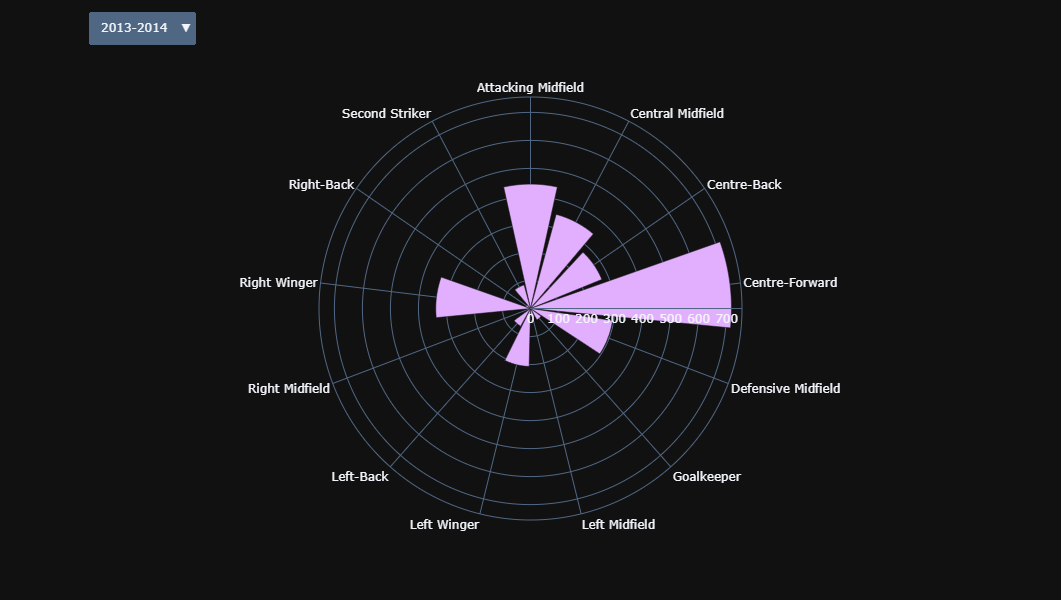

In [383]:
# for each season, cumulative transfer fee by position
bar_polar_position_season(df, "sum")

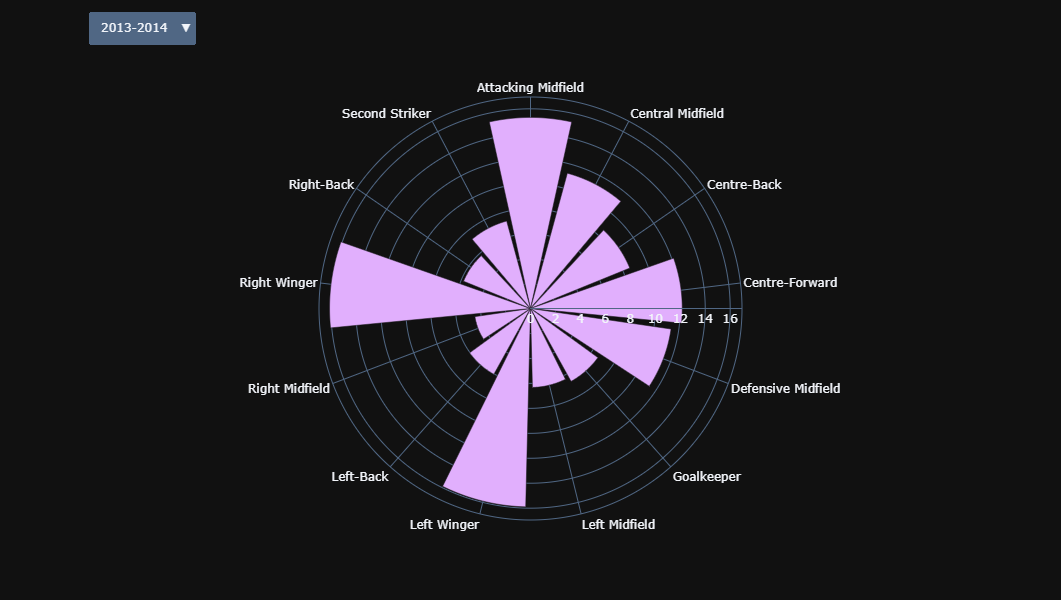

In [384]:
# for each season, average transfer fee by position !

bar_polar_position_season(df, "mean")